List of nbextentions used ([If you're having trouble](https://stackoverflow.com/questions/49647705/jupyter-nbextensions-does-not-appear), answers 2 and 1, in that order, helped me):
* Autopep8
* ExecuteTime
* Initialization cells
* Skip-Traceback
* spellchecker

In [35]:
# Index goes here, still need to add headings and organize with some explanations

using the nbextention "Initialization cells", I first of all save the standard output to the notebook, as it changes with each kernel. <br>
The condition makes sure that no matter what happens, as long as I don't go out of my way to screw up, `saved_std` is always the original standard output.  
This was done so that I can output the verbose cross-validation grids to the terminal without bogging down this notebook.

In [1]:
import sys

if str(type(sys.stdout)) == "<class 'ipykernel.iostream.OutStream'>":
    saved_std = sys.stdout
else:
    sys.stdout = saved_std

import warnings
warnings.filterwarnings('ignore')  # Not sure what this does anymore :(
sys.stdout

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [3]:
df = pd.read_csv('Data/train.csv',
                 index_col='PassengerId').fillna(value={'Cabin': 'Unknown'})
test = pd.read_csv(
    'Data/test.csv', index_col='PassengerId').fillna(value={'Cabin': 'Unknown'})
# y = df['Survived']
# df.drop(['Survived'],axis=1,inplace=True)
ageDist = df.Age.dropna().to_list()
ageTest = pd.concat([df.Age,test.Age]).dropna().to_list() # No data leakage :)
FareTest = pd.concat([df.Fare,test.Fare]).dropna().to_list() # No data leakage :)

In [4]:
display(df.isna().sum())
display(test.isna().sum()) # Fare is missing 1

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      2
dtype: int64

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Cabin        0
Embarked     0
dtype: int64

In [5]:
# Fill age missing data using age distribution:
rng = np.random.default_rng(seed=7)
filler = [ageDist[int(np.round(i*len(ageDist)))]
          for i in rng.random(df.Age.isna().sum())]
print(sum(ageDist)/len(ageDist))  # 29.7
print(sum(filler)/len(filler))  # 28.9
print(len(filler))  # 177

df.loc[df.Age.isnull(), 'Age'] = filler
print("\nAge.describe:")
print(df.Age.describe())  # Notice the average going up.

29.69911764705882
28.94683615819209
177

Age.describe:
count    891.000000
mean      29.549675
std       14.555493
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [6]:
# Fill age missing data using age distribution:
filler = [ageTest[int(np.round(i*len(ageTest)))]
          for i in rng.random(test.Age.isna().sum())]
print(sum(ageTest)/len(ageTest))  # 29.9
print(sum(filler)/len(filler))  # 28.5
print(len(filler)) # 86

test.loc[test.Age.isnull(), 'Age'] = filler
print("\nAge.describe:")
print(test.Age.describe())

29.881137667304014
28.523255813953487
86

Age.describe:
count    418.000000
mean      29.912679
std       14.058144
min        0.170000
25%       21.000000
50%       27.500000
75%       38.875000
max       76.000000
Name: Age, dtype: float64


In [7]:
# Fill fare missing data using fare distribution:
filler = [FareTest[int(np.round(i*len(FareTest)))]
          for i in rng.random(test.Fare.isna().sum())]
print(sum(FareTest)/len(FareTest))  # 33.3
print(sum(filler)/len(filler))  # 30.7
print(len(filler)) # 1 lol

test.loc[test.Fare.isnull(), 'Fare'] = filler
print("\nFare.describe:")
print(test.Fare.describe())

33.2954792813456
30.6958
1

Fare.describe:
count    418.000000
mean      35.615391
std       55.841021
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64


In [8]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,15.0,1,2,W./C. 6607,23.4500,Unknown,S


Note that only people with a Pclass of 1 have a cabin. Which makes sense since they are the richest.

A feature which may be very useful is the person's title, as it contains both gender and economic status.<br>
The method by which I find all possible titles and assign each person a title is taken from __[here](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)__.

In [9]:
def substrings_in_string(big_string, substrings):
    Sub = None
    for substring in substrings:
        if big_string.find(substring) != -1:
            if Sub == None:
                Sub = substring
            elif len(Sub) < len(substring):
                Sub = substring
    if Sub == None:
        print(big_string)
    return Sub

In [10]:
# Titles = ['Mr','Mrs','Miss','Master']

# # all other titles must be found and entered by hand
# # since there is no pattern to their placement
# for Name in df['Name']:
#     if substrings_in_string(Name,Titles) == None:
#         Title = input("Please enter this person's title:")
#         Titles.append(Title)

# for Name in test['Name']:
#     if substrings_in_string(Name,Titles) == None:
#         Title = input("Please enter this person's title:")
#         Titles.append(Title)

Titles = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don', 'Rev', 'Dr', 'Mme',
          'Ms', 'Major', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer', 'Mr Morgan', 'Mrs Morgan']

# The morgan family has this structure: 'Name and whatever ("Mr/s Morgan")'
# which means I'll have to make a special case for them.
# If the problem was bigger I'd deal with the underlying issue.

df['Title'] = df['Name'].apply(substrings_in_string, substrings=Titles)
test['Title'] = test['Name'].apply(substrings_in_string, substrings=Titles)

The list of titles is quite big and contains many titles that appear with a very low frequency.<br>
I'd like to simplify them, the method by which I reduce the number of titles is also taken from __[here](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)__.

In [11]:
def replace_titles(x):
    title = x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Mr Morgan']:
        return 'Mr.'
    elif title in ['Countess', 'Mme', 'Mrs Morgan']:
        return 'Mrs.'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Dr':
        if x['Sex'] == 'Male':
            return 'Mr.'
        else:
            return 'Mrs.'
    else:
        return title

In [12]:
df['Title'] = df.apply(replace_titles, axis=1)
test['Title'] = test.apply(replace_titles, axis=1)

The deck which a person stayed on may be relevant, as some cabins were closer to the lifeboats.<br>
However, this column contains by far the highest percentage of missing data which may hurt the model.

In [13]:
df['Deck'] = [Cab[0] for Cab in df['Cabin']]
test['Deck'] = [Cab[0] for Cab in test['Cabin']]
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr.,U
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss.,U
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr.,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,Mr.,U
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,15.0,1,2,W./C. 6607,23.4500,Unknown,S,Miss.,U


In [14]:
def PercentPivot(df, index, columns):
    # Assuming index has 2 values
    table = df[[index, columns]].pivot_table(
        index=index, columns=columns, aggfunc=len).fillna(0)
    # Sanity check and benchmark.
    table['Sum'] = pd.Series([table.iloc[0, :].sum(), table.iloc[1, :].sum()])
    # Unsure how to deal with multiple columns in 'columns'
    cols = table.columns.to_list()
    pcents = []
    for i in range(len(cols)):
        pcents.append(table.iloc[1, i]/table.iloc[:, i].sum() * 100)
    return pd.concat([table, pd.DataFrame([pcents], columns=cols, index=['%'])])

,1,2,3,Sum
0,80.000000,97.000000,372.000000,549.000000
1,136.000000,87.000000,119.000000,342.000000
%,62.962963,47.282609,24.236253,38.383838


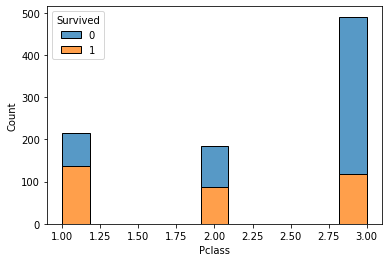

In [116]:
sns.histplot(data=df, x='Pclass', hue='Survived', multiple='stack')
PercentPivot(df, 'Survived', 'Pclass')

Pclass seems to be a good indicator of survivorship, only needs OHE (or the same encoding but with one less column).

,female,male,Sum
0,81.000000,468.000000,549.000000
1,233.000000,109.000000,342.000000
%,74.203822,18.890815,38.383838


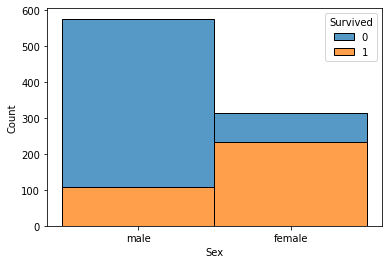

In [17]:
sns.histplot(data=df, x='Sex', hue='Survived', multiple='stack')
PercentPivot(df, 'Survived', 'Sex')

Sex seems to be a very strong indicator of survivorship, all that's left to do is make it binary (ofc, only in this context).

,0,1,2,3,4,5,8,Sum
0,398.000000,97.000000,15.000000,12.0,15.000000,5.0,7.0,549.000000
1,210.000000,112.000000,13.000000,4.0,3.000000,0.0,0.0,342.000000
%,34.539474,53.588517,46.428571,25.0,16.666667,0.0,0.0,38.383838


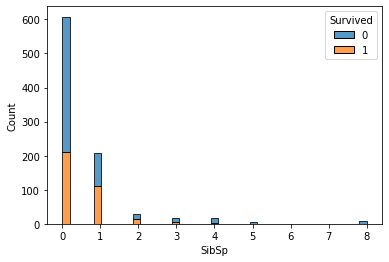

In [118]:
sns.histplot(data=df, x='SibSp', hue='Survived', multiple='stack')
PercentPivot(df, 'Survived', 'SibSp')

From this we gather that having 3 or more siblings/spouses(?) on board is likely to negatively affect your chances.  
Having 1 or 2 siblings/spouses on board is likely to positively affect your chances.  
And not having a spouse or sibling on board may negatively affect your chances slightly.  
In my opinion, the binary features "Has 1 or 2 SibSp" and "Has 3 or more SibSp" are worth exploring.

,0,1,2,3,4,5,6,Sum
0,445.000000,53.000000,40.0,2.0,4.0,4.0,1.0,549.000000
1,233.000000,65.000000,40.0,3.0,0.0,1.0,0.0,342.000000
%,34.365782,55.084746,50.0,60.0,0.0,20.0,0.0,38.383838


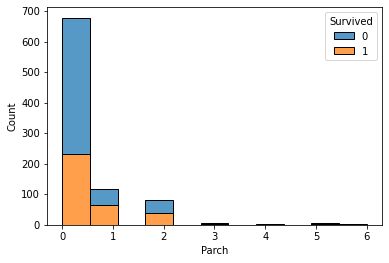

In [12]:
sns.histplot(data=df, x='Parch', hue='Survived', multiple='stack')
PercentPivot(df, 'Survived', 'Parch')

I think that not having a child or a parent on-board doesn't actually matter.
<br>IMO all that 0 conveys is that you are not a child, which decreases your chances of survival.
<br>Notice that there's a sort of "Over-representation of children" in "parch" = 1. A family of 1 mother and 3 children will add 1 passenger with "parch" = 3, and 3 children with "parch" = 1. A similar thing happens in "parch" = 2 to a lesser degree.
<br>That's also why having a high "parch" means you'll probably die as you are an adult who's caring for a family.
<br>The survival rates you see here are merely a result of that "skew".
<br>The survival rate we should actually look at are of "Age" > 19 and "parch" > 0. Or of "parch" > 0 and "Title" == "Mr" or "Mrs".

In [19]:
parentsDB_1 = df.query('((Title == "Mr.") | (Title == "Mrs."))  & (Parch > 0)')
parentsDB_2 = df.query('(Age > 19) & (Parch > 0)')
parentsDB_3 = df.query('(Age > 19) & ((Title == "Mr.") | (Title == "Mrs."))  & (Parch > 0)')
display(PercentPivot(parentsDB_1, 'Survived', 'Parch'))
display(PercentPivot(parentsDB_2, 'Survived', 'Parch'))
display(PercentPivot(parentsDB_3, 'Survived', 'Parch'))

,1,2,3,4,5,6,Sum
0,36.000000,16.000000,2.0,4.0,4.0,1.0,63.000000
1,31.000000,12.000000,3.0,0.0,1.0,0.0,47.000000
%,46.268657,42.857143,60.0,0.0,20.0,0.0,42.727273


,1,2,3,4,5,6,Sum
0,31.000000,16.000000,1.0,4.0,4.0,1.0,57.0
1,35.000000,18.000000,3.0,0.0,1.0,0.0,57.0
%,53.030303,52.941176,75.0,0.0,20.0,0.0,50.0


,1,2,3,4,5,6,Sum
0,28.000000,11.0,1.0,4.0,4.0,1.0,49.00000
1,30.000000,11.0,3.0,0.0,1.0,0.0,45.00000
%,51.724138,50.0,75.0,0.0,20.0,0.0,47.87234


It seems that parents have a higher chance of survival, with 47% of parents surviving.  
From the very limited data here, it seems that parents of many children have a lower chance of survival.

,0-10,11-18,18-21,21-24,24-26,26-29,29-31,31-35,35-39,39-45,45-54,54-80,Sum
0,36.000000,45.000000,55.000000,49.000000,48.000000,47.000000,47.000000,43.000000,48.000000,49.000000,46.000000,36.000000,549.000000
1,40.000000,31.000000,21.000000,27.000000,28.000000,29.000000,29.000000,33.000000,28.000000,27.000000,30.000000,19.000000,342.000000
%,52.631579,40.789474,27.631579,35.526316,36.842105,38.157895,38.157895,43.421053,36.842105,35.526316,39.473684,34.545455,38.383838


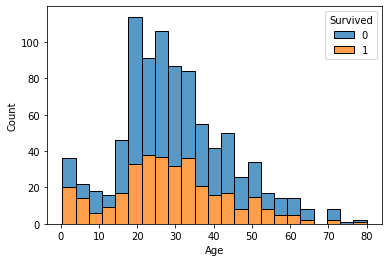

In [7]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')

boundry = 10
binSize = (df.loc[df.Age <= boundry, 'Age'].size)

# Sort by age and then bin
sortAge = df.loc[:, ['Age', 'Survived']].sort_values(by=['Age'])
temp = sortAge.iloc[0:binSize, :]
pivotAge = pd.DataFrame(data=[binSize - temp.Survived.sum(), temp.Survived.sum()],
                        index=[0, 1], columns=[f'0-{int(round(boundry))}'])
for i in range(1, df.Age.size//binSize):
    temp = sortAge.iloc[i*binSize:(i+1)*binSize, :]
    low = int(round(sortAge.iloc[i*binSize, 0]))
    high = int(round(sortAge.iloc[(i+1)*binSize-1, 0]))
    pivotAge[f'{low}-{high}'] = [binSize -
                                 temp.Survived.sum(), temp.Survived.sum()]

temp = sortAge.iloc[(df.Age.size//binSize)*binSize:, :]
if not temp.empty:
    low = int(round(sortAge.iloc[(df.Age.size//binSize)*binSize, 0]))
    high = int(round(sortAge.iloc[-1, 0]))
    pivotAge[f'{low}-{high}'] = [temp.size/2 -
                                 temp.Survived.sum(), temp.Survived.sum()]

pivotAge['Sum'] = pd.Series(
    [pivotAge.iloc[0, :].sum(), pivotAge.iloc[1, :].sum()])
cols = pivotAge.columns.to_list()
pcents = []
for i in range(len(cols)):
    pcents.append(pivotAge.iloc[1, i]/pivotAge.iloc[:, i].sum() * 100)
pivotAge = pd.concat([pivotAge, pd.DataFrame(
    [pcents], columns=cols, index=['%'])])
pivotAge

Children have a high chance of surviving as children and women were rescued first.  
Teens probably preferential treatment.  
Young adults were left behind as they were the fittest.  
I am unsure why the 31-35 group survived more often. Maybe got 'unlucky' with filling in the missing data. 
Older folk have a lower chance of surviving, as expected.

,0,0-10,10-30,30-100,100+,Sum
0,14.000000,255.000000,181.000000,85.000000,14.000000,549.000000
1,1.000000,66.000000,134.000000,102.000000,39.000000,342.000000
%,6.666667,20.560748,42.539683,54.545455,73.584906,38.383838


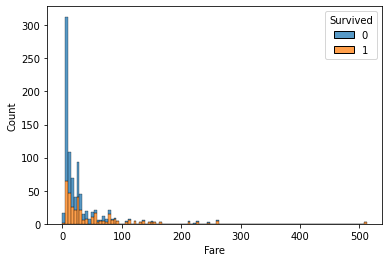

In [10]:
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack')

# I'll decide the ranges:
# 0
# 1-10
# 10-30
# 30-100
# 100+

col_0 = [df.query('Fare == 0')['Survived'].size - df.query('Fare == 0')['Survived'].sum(),
         df.query('Fare == 0')['Survived'].sum()]
col_1 = [df.query('0 < Fare < 10')['Survived'].size - df.query('0 < Fare < 10')['Survived'].sum(),
         df.query('0 < Fare < 10')['Survived'].sum()]
col_2 = [df.query('10 <= Fare < 30')['Survived'].size - df.query('10 <= Fare < 30')['Survived'].sum(),
         df.query('10 <= Fare < 30')['Survived'].sum()]
col_3 = [df.query('30 <= Fare < 100')['Survived'].size - df.query('30 <= Fare < 100')['Survived'].sum(),
         df.query('30 <= Fare < 100')['Survived'].sum()]
col_4 = [df.query('100 <= Fare')['Survived'].size - df.query('100 <= Fare')['Survived'].sum(),
         df.query('100 <= Fare')['Survived'].sum()]
fareData = np.array([col_0,col_1, col_2, col_3, col_4]).T
pivotFare = pd.DataFrame(fareData, index=[0, 1], columns=[
                         '0','0-10', '10-30', '30-100', '100+'])

pivotFare['Sum'] = pd.Series(
    [pivotFare.iloc[0, :].sum(), pivotFare.iloc[1, :].sum()])
cols = pivotFare.columns.to_list()
pcents = []
for i in range(len(cols)):
    pcents.append(pivotFare.iloc[1, i]/pivotFare.iloc[:, i].sum() * 100)

pivotFare = pd.concat(
    [pivotFare, pd.DataFrame([pcents], columns=cols, index=['%'])])

pivotFare

As fares go up so do survival rates.  
From the 10-30 range you already have a higher chance of surviving, and at 100+ you are much more likely to survive.  
A 1/x fit might yield good results.

,C,Q,S,Sum
0,75.000000,47.000000,427.000000,549.000000
1,93.000000,30.000000,217.000000,340.000000
%,55.357143,38.961039,33.695652,38.245219


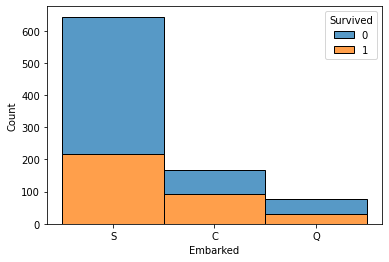

In [121]:
sns.histplot(data=df, x='Embarked', hue='Survived', multiple='stack')
# Notice the 'Sum' column, it shows there are 2 missing survivors.
PercentPivot(df, 'Survived', 'Embarked')

The 2 missing values are not catastrophic here and won't change the probabilities by a considerable amount.  

Departing from port Q seems to have little to no effect on survivorship.  
As a matter of fact, that's somewhat surprising, I wonder if this is to do with rich/poor distributions, young/old or female/male (I doubt it).  
Of course it may be that the distribution perfectly mirrors that of the ship.  

Departing from S seems to negatively affect survivorship. I'd guess that town is poorer.  

Departing from C seem to positively affect survivorship. I'd guess that town is more wealthy.

,Master,Miss,Mr.,Mrs.,Sum
0,17.0,55.00000,447.000000,30.00000,549.000000
1,23.0,130.00000,83.000000,104.00000,340.000000
%,57.5,70.27027,15.660377,77.61194,38.245219


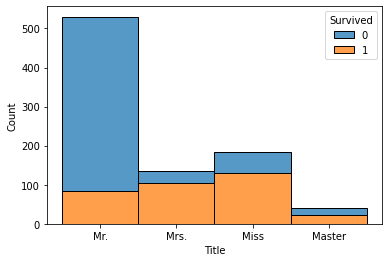

In [22]:
sns.histplot(data=df, x='Title', hue='Survived', multiple='stack')
PercentPivot(df, 'Survived', 'Title')

Seems that a "Mrs." is more likely to survive than a "Miss". Perhaps because a "Mrs." has a husband who will fight for her (a lot more relevant back then, not so much now) or because she is more likely to have a child and be rescued with him.  
"Master" addresses a young man, children were rescued first and so "Master"s survived more often.

,A,B,C,D,E,F,G,T,U,Sum
0,8.000000,12.000000,24.000000,8.000000,8.0,5.000000,2.0,1.0,481.000000,549.000000
1,7.000000,35.000000,35.000000,25.000000,24.0,8.000000,2.0,0.0,206.000000,342.000000
%,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,0.0,29.985444,38.383838


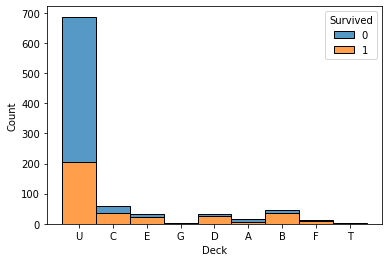

In [123]:
sns.histplot(data=df, x='Deck', hue='Survived', multiple='stack')
PercentPivot(df, 'Survived', 'Deck')

<font size=4>These cabin statistics are quite interesting.  
    Let's have a look at the [physical layout](https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic) of the decks:</font> 
![title](Data/Olympic_&_Titanic_cutaway_diagram.png)
<br>I'll stay reserved in my analysis and say there's no difference between cabin decks, and that the differences we see are caused merely by a small dataset.
<br>I'd expect the lower decks to know of the crash sooner but have a harder time getting to the lifeboats, so it might cancel out.
<br>Since I'm uncertain whether the decks do have an effect or not, I'll add a "Has a cabin" feature, a OHE of the cabin data, and a "Upper Decks", "Lower Decks" feature and see which is the most important.

Port analysis:

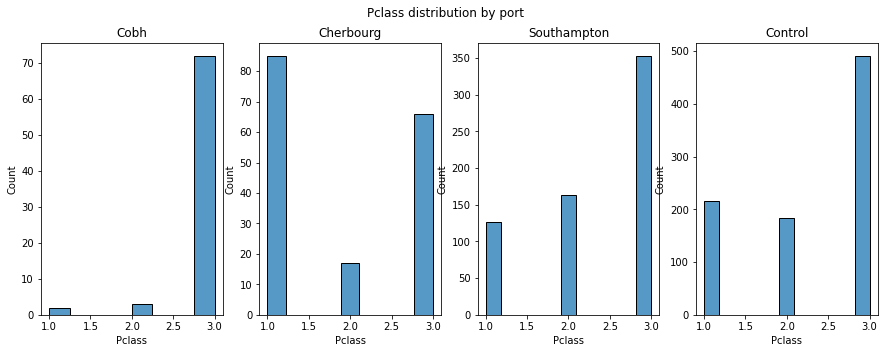

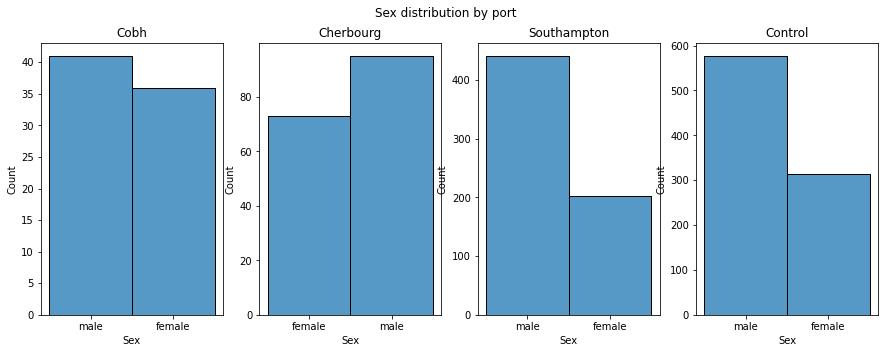

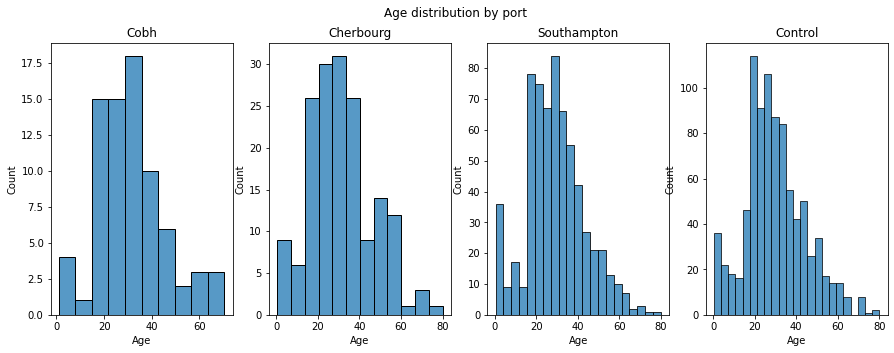

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Pclass distribution by port')

cobh = df.query('Embarked == "Q"')
sns.histplot(ax=axes[0], x=cobh.Pclass)
axes[0].set_title('Cobh')

cherbourg = df.query('Embarked == "C"')
sns.histplot(ax=axes[1], x=cherbourg.Pclass)
axes[1].set_title('Cherbourg')

southampton = df.query('Embarked == "S"')
sns.histplot(ax=axes[2], x=southampton.Pclass)
axes[2].set_title('Southampton')

sns.histplot(ax=axes[3], x=df.Pclass)
axes[3].set_title('Control')

plt.show()


fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Sex distribution by port')

sns.histplot(ax=axes[0], x=cobh.Sex)
axes[0].set_title('Cobh')

sns.histplot(ax=axes[1], x=cherbourg.Sex)
axes[1].set_title('Cherbourg')

sns.histplot(ax=axes[2], x=southampton.Sex)
axes[2].set_title('Southampton')

sns.histplot(ax=axes[3], x=df.Sex)
axes[3].set_title('Control')

plt.show()


fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Age distribution by port')

sns.histplot(ax=axes[0], x=cobh.Age)
axes[0].set_title('Cobh')

sns.histplot(ax=axes[1], x=cherbourg.Age)
axes[1].set_title('Cherbourg')

sns.histplot(ax=axes[2], x=southampton.Age)
axes[2].set_title('Southampton')

sns.histplot(ax=axes[3], x=df.Age)
axes[3].set_title('Control')

plt.show()

Reminder: Q doesn't really do anything, S lowers chances, and C improves chances.  
There don't seem to be Age distribution differences that would explain the results.  
Q's results seem to be balanced out by having poor passengers with more women.  
S's are probably caused by having less women and replacing some Pclass 1 passengers with Pclass 2 (In terms of data).  
C's are probably caused by having more women and richer passengers (maybe even richer women).

### Major takeaways and features to add:

From what I explored here we can start to see why certain relationship are true, what actually helped a passenger survive and what didn't.  
We can also construct the passenger that is most likely to survive:  
* Girl
* 10 (or less) years old
* Paid 100 or more → 1st Class
* 1 sister aboard
* 1 parent aboard
* Has a cabin on deck B
* Married?????

And least likely to survive:
* Man
* Young-Adult, 20 years old
* Didn't pay → 3rd Class
* Has 8+ siblings aboard
* Is a parent to 6+ children
* Single (and **very** active)

I am assuming there is no interaction between these features, which is probably false.  
If the entire family went on a trip both sib/sp and par/ch would be non-zero.  
Someone with many children is probably married.  
And younger passengers probably have less children.

Features I'd like to test or add:
1. \# of Children (when is also parent)
1. hasCabin (same as hasUCabin)
1. Has 1 or 2 sib/sp
1. Has 3+ sib/sp

In [15]:
isParent = ((df['Title'] == 'Mr.') | (df['Title'] == 'Mrs.')) & (df['Parch'] > 0)
testParent = ((test['Title'] == 'Mr.') | (test['Title'] == 'Mrs.')) & (test['Parch'] > 0)
df['hasNChildren'] = isParent * df['Parch']
test['hasNChildren'] = testParent * test['Parch']
PercentPivot(df, 'Survived', 'hasNChildren')

,0,1,2,3,4,5,6,Sum
0,486.000000,36.000000,16.000000,2.0,4.0,4.0,1.0,549.000000
1,295.000000,31.000000,12.000000,3.0,0.0,1.0,0.0,342.000000
%,37.772087,46.268657,42.857143,60.0,0.0,20.0,0.0,38.383838


In [16]:
df['hasCabin'] = (df['Cabin'] != 'Unknown') * 1
test['hasCabin'] = (test['Cabin'] != 'Unknown') * 1
PercentPivot(df, 'Survived', 'hasCabin')

,0,1,Sum
0,481.000000,68.000000,549.000000
1,206.000000,136.000000,342.000000
%,29.985444,66.666667,38.383838


In [17]:
df['has1or2sib'] = ((df['SibSp'] == 1) | (df['SibSp'] == 2)) * 1
test['has1or2sib'] = ((test['SibSp'] == 1) | (test['SibSp'] == 2)) * 1
PercentPivot(df, 'Survived', 'has1or2sib')

,0,1,Sum
0,437.000000,112.000000,549.000000
1,217.000000,125.000000,342.000000
%,33.180428,52.742616,38.383838


In [18]:
df['has3PSib'] = (3 <= df['SibSp']) * 1
test['has3PSib'] = (3 <= test['SibSp']) * 1
PercentPivot(df, 'Survived', 'has3PSib')

,0,1,Sum
0,510.00000,39.000000,549.000000
1,335.00000,7.000000,342.000000
%,39.64497,15.217391,38.383838


In [165]:
display(df)
display(test)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,hasNChildren,hasCabin,has1or2sib,has3PSib
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr.,U,0,0,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C,0,1,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss.,U,0,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,C,0,1,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr.,U,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,Mr.,U,0,0,0,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,B,0,1,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3.0,1,2,W./C. 6607,23.4500,Unknown,S,Miss.,U,0,0,1,0


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,hasNChildren,hasCabin,has1or2sib,has3PSib
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Mr.,U,0,0,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Mrs.,U,0,0,1,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Mr.,U,0,0,0,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Mr.,U,0,0,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs.,U,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,Unknown,S,Mr.,U,0,0,0,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mr.,C,0,1,0,0
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S,Mr.,U,0,0,0,0


We'll drop the unnecessary columns:

In [19]:
df.drop(columns=['Ticket','Name','Cabin']).to_csv('Data/modifiedData.csv')
test.drop(columns=['Ticket','Name','Cabin']).to_csv('Data/modifiedTest.csv')